## Introduction

Spine problems can be caused  due to various reasons and can vary from mild pain to severe. They can happen because of several reasons like bone diseases or muscle conditions or irritation of the nerves which can radiate to other parts of the body.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to save the file at the end of the step
import os
from library.sb_utils import save_file

In [2]:
lbp_data = pd.read_csv('../raw_data/Dataset_spine.csv')

In [3]:
lbp_data.shape

(310, 14)

In [4]:
lbp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Col1         310 non-null    float64
 1   Col2         310 non-null    float64
 2   Col3         310 non-null    float64
 3   Col4         310 non-null    float64
 4   Col5         310 non-null    float64
 5   Col6         310 non-null    float64
 6   Col7         310 non-null    float64
 7   Col8         310 non-null    float64
 8   Col9         310 non-null    float64
 9   Col10        310 non-null    float64
 10  Col11        310 non-null    float64
 11  Col12        310 non-null    float64
 12  Class_att    310 non-null    object 
 13  Unnamed: 13  14 non-null     object 
dtypes: float64(12), object(2)
memory usage: 34.0+ KB


In [5]:
lbp_data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [6]:
lbp_data.tail()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal,NaN
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal,NaN
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal,NaN
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal,NaN
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,0.674504,19.3825,17.6963,13.72929,1.783007,40.6049,Normal,NaN


This data consists of 310 observations which are described by 12 descriptive features that are the anthropometric measurements of the structure of spine and other nearby bony structures and a decision-making attribute which determines if the person is normal or abnormal.

Our plan is to figure out if a person has a low back pain or not based on the data about the anthropometric measurements of the spine.v

## Explore the data

The default columns' names do not give us a lot of information but the columns do have a title with column number except a column which shows as unnamed. The data type it consists of is object. Hence,we need to explore the column.

In [7]:
lbp_data['Unnamed: 13']

0                                                    NaN
1                                                    NaN
2      Prediction is done by using binary classificat...
3                                                    NaN
4                                                    NaN
                             ...                        
305                                                  NaN
306                                                  NaN
307                                                  NaN
308                                                  NaN
309                                                  NaN
Name: Unnamed: 13, Length: 310, dtype: object

Its not showing details of the column completely. So, we need to check through the rows to see what the column contains except NaN values.

In [8]:
lbp_data['Unnamed: 13'][:40]

0                                                   NaN
1                                                   NaN
2     Prediction is done by using binary classificat...
3                                                   NaN
4                                                   NaN
5            Attribute1  = pelvic_incidence  (numeric) 
6                   Attribute2 = pelvic_tilt (numeric) 
7         Attribute3 = lumbar_lordosis_angle (numeric) 
8                  Attribute4 = sacral_slope (numeric) 
9                 Attribute5 = pelvic_radius (numeric) 
10     Attribute6 = degree_spondylolisthesis (numeric) 
11                    Attribute7= pelvic_slope(numeric)
12                     Attribute8= Direct_tilt(numeric)
13                  Attribute9= thoracic_slope(numeric)
14                  Attribute10= cervical_tilt(numeric)
15                    Attribute11=sacrum_angle(numeric)
16                Attribute12= scoliosis_slope(numeric)
17                                              

It looks like this column has the names of other columns which contains a specific attribute in each column. We could save it separately and drop the whole column as it doesn't contain any attribute.

In [9]:
columns = ['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','class']

In [10]:
lbp_data.drop("Unnamed: 13",axis=1,inplace=True)

In [11]:
lbp_data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [12]:
lbp_data.columns = columns
lbp_data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [13]:
lbp_data.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,0.674504,19.3825,17.6963,13.72929,1.783007,40.6049,Normal


In [14]:
lbp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  class                     310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [15]:
lbp_data.shape

(310, 13)

## Column Information

The data contains the anthropometric measurements of the curvature of the spine. These measurements can be taken using a goniometer (a tool used to measure angles in joints).

## Check Null Values

In [16]:
lbp_data.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
class                       0
dtype: int64

It seems like none of the attributes have any missing values in the columns.

## Target Variable

In [17]:
lbp_data.select_dtypes(include = [object])

,class
0,Abnormal
1,Abnormal
2,Abnormal
3,Abnormal
4,Abnormal
...,...
305,Normal
306,Normal
307,Normal
308,Normal


In [18]:
lbp_data['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

<AxesSubplot:>

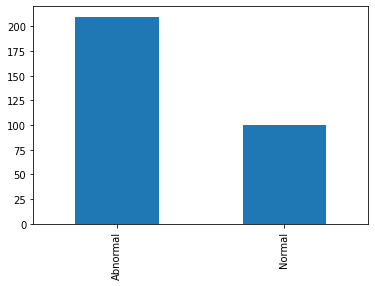

In [19]:
lbp_data['class'].value_counts().plot.bar()

The data includes 100 of normal conditions and 210 of abnormal conditions which means they are suffering from low back pain.
This might not be an ideal situation as there is imbalance in the data with two classes which can affect the quality of our classifier training. 
On the other hand, this situation might mean that more people are affected by low back pain in the general scenario which sounds a little more realistic nowadays.

## Numerical Features

In [20]:
lbp_data.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [21]:
lbp_data[lbp_data['class'] == "Abnormal"].describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,64.692562,19.791111,55.925370,44.901450,115.077713,37.777705,0.483979,21.085875,12.948913,12.132737,-13.826677,25.146915
std,17.662129,10.515871,19.669471,14.515560,14.090605,40.696741,0.286319,8.550365,3.516762,2.848401,12.029824,10.242513
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-10.675871,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,50.102507,13.048130,41.116964,34.380345,107.309280,7.263227,0.250212,13.054400,10.151175,9.801870,-23.732086,16.900900
50%,65.274888,18.798899,56.150000,44.639597,115.650323,31.946516,0.501280,21.750600,12.770050,11.973735,-14.892070,24.509400
75%,77.593672,24.815515,68.102805,55.146868,123.133365,55.371614,0.708476,28.194975,15.950475,14.609660,-2.937705,33.204375
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.868423,44.233800


In [22]:
lbp_data[lbp_data['class'] == "Normal"].describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572,0.449880,21.816394,13.307268,11.514534,-14.528712,26.694019
std,12.368161,6.778503,12.361388,9.624004,9.014246,6.307483,0.284711,8.846484,3.142902,2.955985,12.675224,10.852099
min,30.741938,-5.845994,19.071075,17.386972,100.501192,-11.058179,0.005045,7.390700,7.475200,7.054110,-35.077537,7.432400
25%,42.817849,8.799951,35.000000,32.340487,118.182659,-1.511360,0.201843,13.164225,11.053625,8.706198,-26.789617,17.838050
50%,50.123115,13.482435,42.638923,37.059694,123.874328,1.152710,0.418732,22.414600,13.409750,11.330750,-13.974694,27.727950
75%,61.470097,16.785953,51.602346,44.608788,129.040401,4.968807,0.695981,29.760625,15.568925,13.816777,-4.488790,35.660300
max,89.834676,29.894119,90.563461,67.195460,147.894637,31.172767,0.997247,36.619400,19.265900,16.617540,6.972071,44.341200


In [23]:
features = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope']

In [24]:
long_data = pd.melt(lbp_data, id_vars = ['class'], value_vars = features)

In [25]:
long_data.head()

,class,variable,value
0,Abnormal,pelvic_incidence,63.027817
1,Abnormal,pelvic_incidence,39.056951
2,Abnormal,pelvic_incidence,68.832021
3,Abnormal,pelvic_incidence,69.297008
4,Abnormal,pelvic_incidence,49.712859


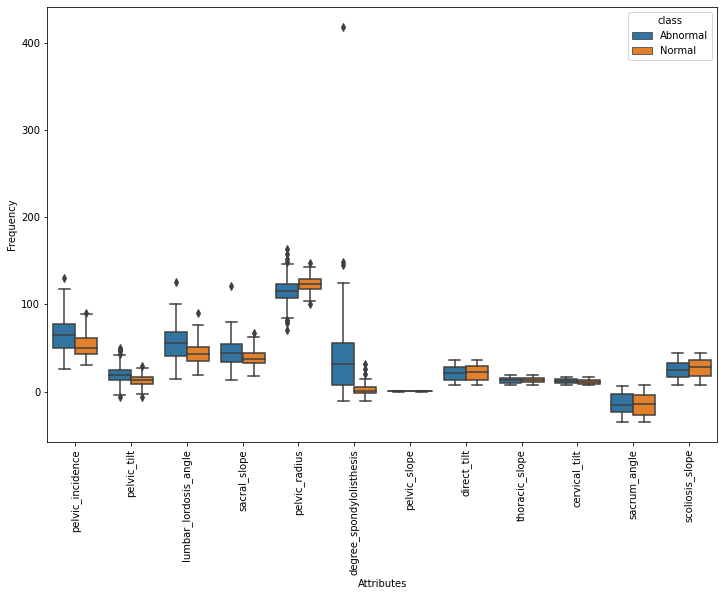

In [26]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x = 'variable', y ='value',hue = 'class', data=long_data)
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Attributes');

We can see that the last 6 features pelvic_slope, direct_tilt, thoracic_slope, cervical_tilt, sacrm_angle, scoliosis_slope don't show much contrast between two classes and have similar median and quartile values as well as the minimum and maximum values.
There seems to be a outlier in the degree_spondylolisthesis column which we will have to deal with in later stages.

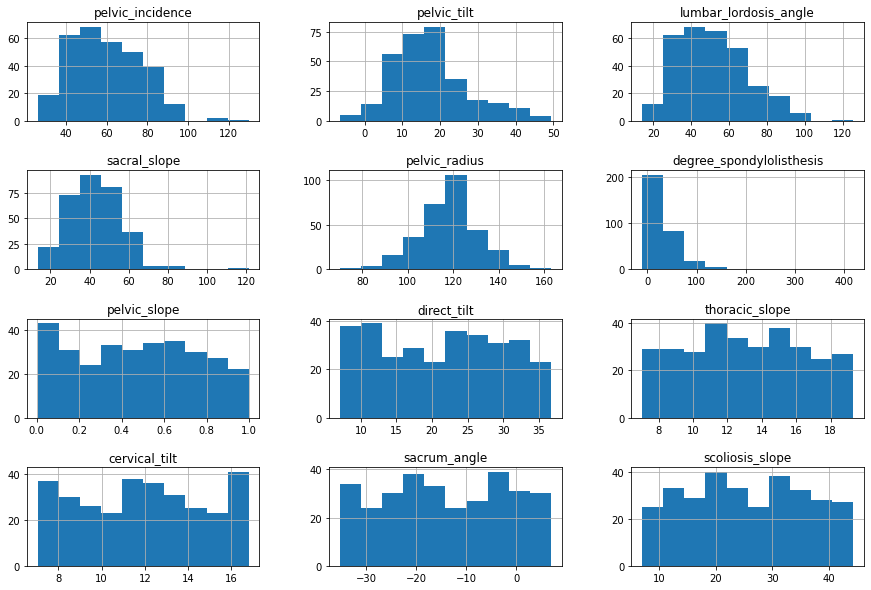

In [27]:
lbp_data.hist(figsize = (15,10))
plt.subplots_adjust(hspace = 0.5);

## Save Data

In [28]:
lbp_data.shape

(310, 13)

In [29]:
datapath = '../data'
save_file(lbp_data, 'lbp_data_cleaned.csv', datapath)

Writing file.  "../data/lbp_data_cleaned.csv"
